In [843]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [844]:
def custom_split(x):
        x = x.split('.')[:-1]
        lst = []
        for i in x:
                lst.append(i.split(':')[0])
        return lst

In [845]:
new_names = custom_split('age: continuous.workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.fnlwgt: continuous.education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.education-num: continuous.marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.sex: Female, Male.capital-gain: continuous.capital-loss: continuous.hours-per-week: continuous.native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.')
new_names.append('income')

In [846]:
new_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [847]:
adult = pd.read_csv('adult.data.csv', names=new_names, sep=', ')

C:\Users\DELL\AppData\Local\Temp\ipykernel_20536\122881984.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  adult = pd.read_csv('adult.data.csv', names=new_names, sep=', ')


In [848]:
test = pd.read_csv('adult.test.csv', names=new_names, sep=', ')

C:\Users\DELL\AppData\Local\Temp\ipykernel_20536\3677340217.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv('adult.test.csv', names=new_names, sep=', ')


In [849]:
test['income'] = test['income'].apply(lambda x:x.split('.')[0])

In [850]:
con = pd.concat([adult,test])

In [851]:
con.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [852]:
# add remainder column
# drop education
# drop native_country
# drop race

In [853]:
con['remainder'] = con['capital-gain'] - con['capital-loss']

In [854]:
con.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,remainder
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [855]:
con['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

<Axes: xlabel='race', ylabel='count'>

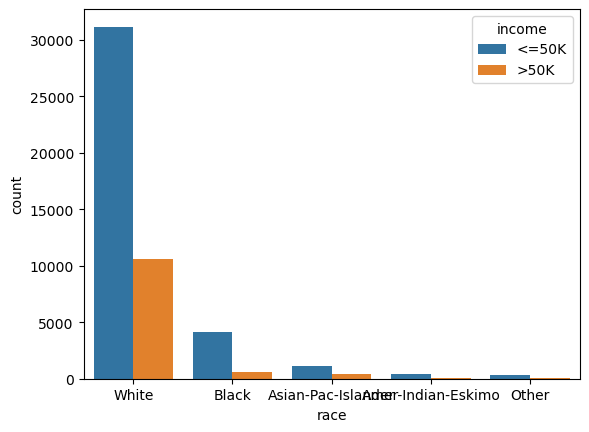

In [856]:
sns.countplot(data=con, x='race', hue='income')

In [857]:
con['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

<Axes: xlabel='relationship', ylabel='count'>

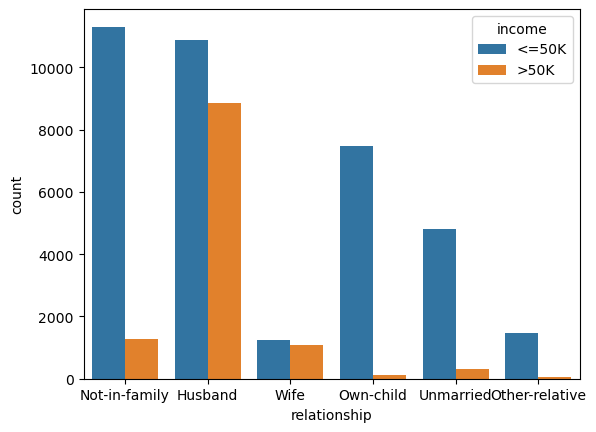

In [858]:
sns.countplot(data=con, x='relationship', hue='income')

<Axes: xlabel='marital-status', ylabel='count'>

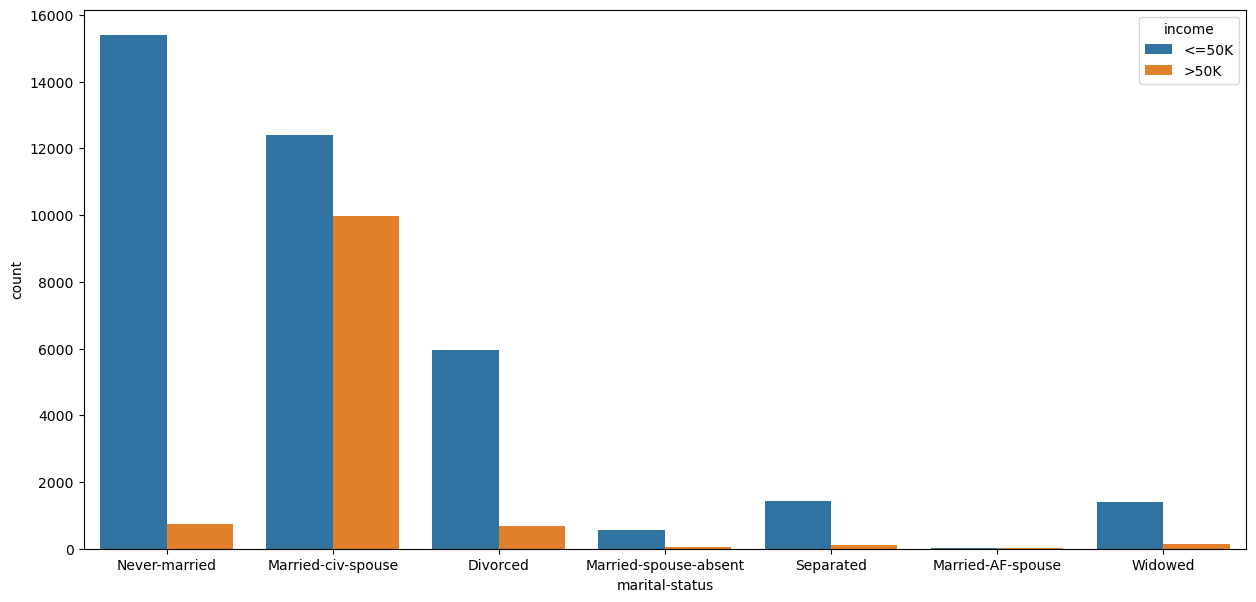

In [859]:
plt.figure(figsize=(15,7))
sns.countplot(data=con, x='marital-status', hue='income')

In [860]:
con['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

<Axes: xlabel='native-country', ylabel='count'>

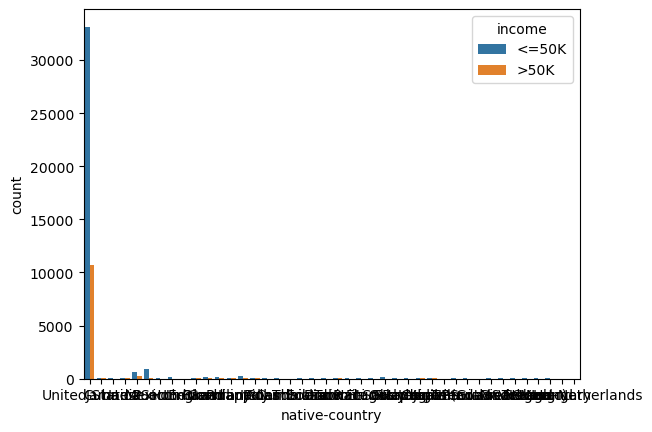

In [861]:
sns.countplot(data=con, x='native-country', hue='income')

In [862]:
con['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

<Axes: xlabel='occupation', ylabel='count'>

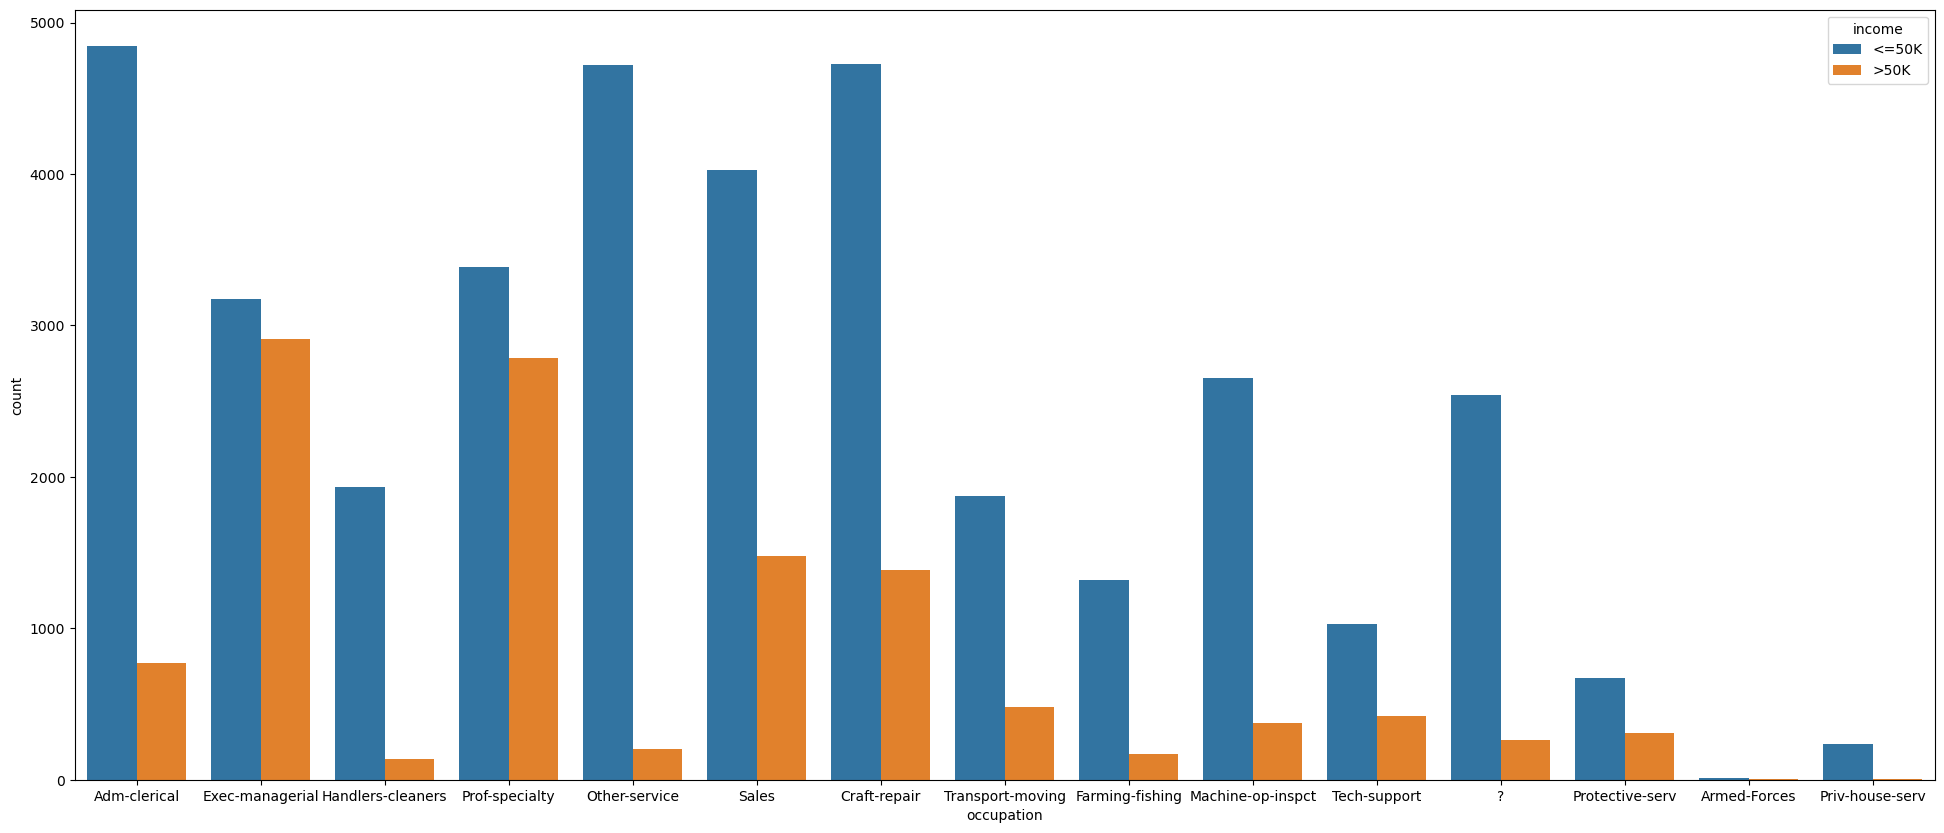

In [863]:
plt.figure(figsize=(24,10))
sns.countplot(data=con, x='occupation', hue='income')

In [864]:
con.drop(['education','native-country','race','relationship','fnlwgt'], axis=1, inplace=True)

In [865]:
con['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [866]:
con['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [867]:
# plt.figure(figsize=(24,10))
# sns.countplot(data=con, x='occupation', hue='sex')

In [868]:
# con['native-country'].value_counts()

In [869]:
con['workclass'] = con['workclass'].replace('?',None)
# con['occupation'] = con['occupation'].replace('?',None)
# con['native-country'] = con['native-country'].replace('?',None)

<Axes: >

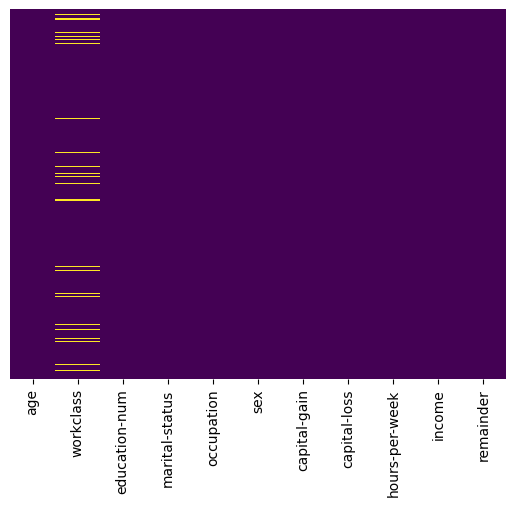

In [870]:
sns.heatmap(con.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [871]:
def occupation_sex(cols):
    occupation = cols[0]
    sex = cols[1]
    
    if pd.isnull(occupation):

        if sex == 'Male':
            return 'Craft-repair'

        elif sex == 'Female':
            return 'Adm-clerical'

    else:
        return occupation

In [872]:
con['workclass'] = con['workclass'].fillna('Private')
con['occupation'] = con['occupation'].fillna('Prof-specialty')
# con['native-country'] = con['native-country'].fillna('United-States')

In [873]:
# plt.figure(figsize=(24,10))
# sns.countplot(data=con, x='occupation', hue='sex')

<Axes: >

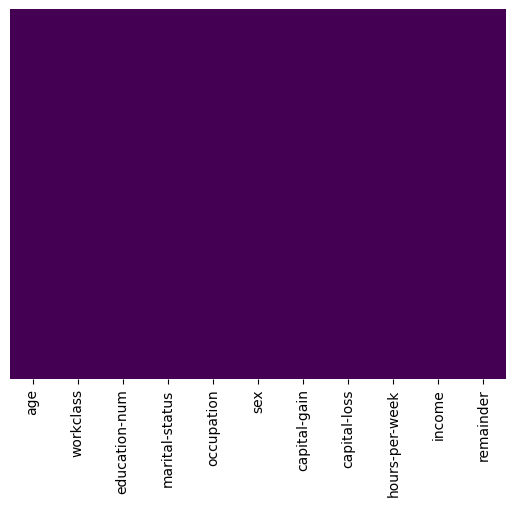

In [874]:
sns.heatmap(con.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [875]:
# con['occupation'].value_counts()

In [876]:
con.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,remainder
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382,991.565313
std,13.710510,2.570973,7452.019058,403.004552,12.391444,7475.549906
min,17.000000,1.000000,0.000000,0.000000,1.000000,-4356.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,99999.000000


In [877]:
con.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16280
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education-num   48842 non-null  int64 
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   sex             48842 non-null  object
 6   capital-gain    48842 non-null  int64 
 7   capital-loss    48842 non-null  int64 
 8   hours-per-week  48842 non-null  int64 
 9   income          48842 non-null  object
 10  remainder       48842 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 4.5+ MB


In [878]:
con.head()

,age,workclass,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,income,remainder
0,39,State-gov,13,Never-married,Adm-clerical,Male,2174,0,40,<=50K,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,13,<=50K,0
2,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,40,<=50K,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,<=50K,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Female,0,0,40,<=50K,0


<Axes: xlabel='workclass', ylabel='count'>

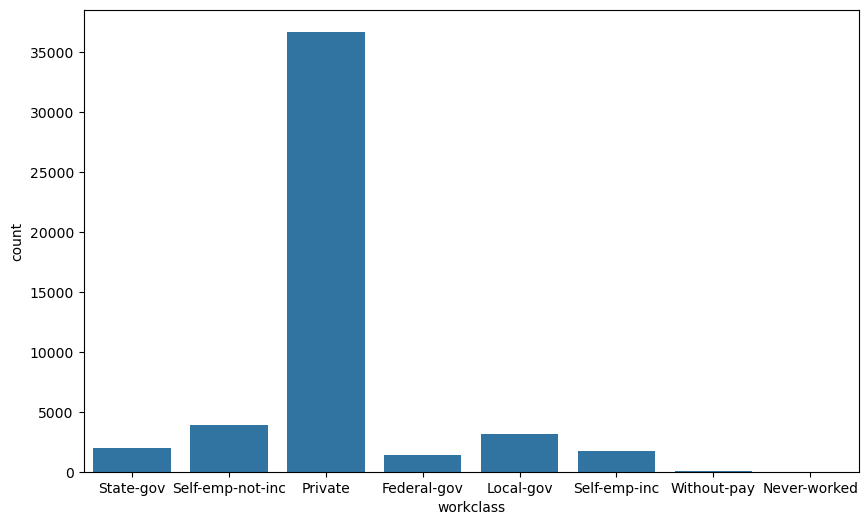

In [879]:
plt.figure(figsize=(10,6))
sns.countplot(x=con['workclass'])

In [880]:
# adult['income'] = pd.get_dummies(adult['income'],drop_first=True)
# adult['income']

In [881]:
# adult['sex'] = pd.get_dummies(adult['sex'],drop_first=True)
# adult['sex']

In [882]:
# workclass = pd.get_dummies(adult['workclass'],drop_first=True)

In [883]:
# workclass

In [884]:
# adult = pd.concat([adult,workclass],axis=1)

In [885]:
# adult.drop('workclass', axis=1, inplace=True)

In [886]:
# education = pd.get_dummies(adult['education'],drop_first=True)

In [887]:
# adult = pd.concat([adult,education],axis=1)

In [888]:
# adult.drop('education', axis=1, inplace=True)

In [889]:
con.head()

,age,workclass,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,income,remainder
0,39,State-gov,13,Never-married,Adm-clerical,Male,2174,0,40,<=50K,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,13,<=50K,0
2,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,40,<=50K,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,<=50K,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Female,0,0,40,<=50K,0


In [890]:
# marital_status = pd.get_dummies(adult['marital-status'],drop_first=True)

In [891]:
# adult = pd.concat([adult,marital_status],axis=1)

In [892]:
# adult.drop('marital-status', axis=1, inplace=True)

In [893]:
con.head()

,age,workclass,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,income,remainder
0,39,State-gov,13,Never-married,Adm-clerical,Male,2174,0,40,<=50K,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,13,<=50K,0
2,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,40,<=50K,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,<=50K,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Female,0,0,40,<=50K,0


In [894]:
names = con.columns

In [895]:
def dummies(x):
        for i in names:
                if x[i].dtype == 'O':
                        dm = pd.get_dummies(x[i],drop_first=True)
                        x = pd.concat([x,dm],axis=1)
                        x.drop(i, axis=1, inplace=True)
        return x

In [896]:
con = dummies(con)

In [897]:
con.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,remainder,Local-gov,Never-worked,Private,Self-emp-inc,...,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Male,>50K
0,39,13,2174,0,40,2174,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,50,13,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,38,9,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,53,7,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,28,13,0,0,40,0,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [898]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [899]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [900]:
new_adult = con[:32561]
new_test = con[32561:]

In [901]:
new_adult.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,remainder,Local-gov,Never-worked,Private,Self-emp-inc,...,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Male,>50K
0,39,13,2174,0,40,2174,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,50,13,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,38,9,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,53,7,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,28,13,0,0,40,0,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [902]:
new_test.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,remainder,Local-gov,Never-worked,Private,Self-emp-inc,...,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Male,>50K
0,25,7,0,0,40,0,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,38,9,0,0,50,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,28,12,0,0,40,0,True,False,False,False,...,False,False,False,False,True,False,False,False,True,True
3,44,10,7688,0,40,7688,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True
4,18,10,0,0,30,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [903]:
from sklearn.linear_model import LogisticRegression

In [904]:
logmodel = LogisticRegression()
logmodel.fit(new_adult.drop('>50K',axis=1),new_adult['>50K'])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [905]:
predictions = logmodel.predict(new_test.drop('>50K',axis=1))

In [906]:
from sklearn.metrics import confusion_matrix,classification_report

In [907]:
print(confusion_matrix(new_test['>50K'],predictions))
print()
print(classification_report(new_test['>50K'],predictions))

[[11548   887]
 [ 1682  2164]]

              precision    recall  f1-score   support

       False       0.87      0.93      0.90     12435
        True       0.71      0.56      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281

